In [5]:
import ast
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
movie_detailed_info=pd.read_csv(r'Downloads/tmdb_5000_credits.csv/tmdb_5000_credits.csv')
movie_info=pd.read_csv(r'Downloads/tmdb_5000_movies.csv/tmdb_5000_movies.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/tmdb_5000_credits.csv/tmdb_5000_credits.csv'

In [9]:
movie_info.head(3)

NameError: name 'movie_info' is not defined

In [11]:
movie_detailed_info.head(3)

NameError: name 'movie_detailed_info' is not defined

In [13]:
merged_df = pd.merge(right=movie_info, left=movie_detailed_info, left_on='movie_id', right_on='id', how='inner')

NameError: name 'movie_info' is not defined

In [15]:
merged_df.shape[0]

NameError: name 'merged_df' is not defined

In [20]:
merged_df.describe()

NameError: name 'merged_df' is not defined

In [22]:
merged_df.drop_duplicates(inplace=True)

NameError: name 'merged_df' is not defined

In [15]:
merged_df[['vote_average', 'vote_count','title_x']].isnull().sum()

vote_average    0
vote_count      0
title_x         0
dtype: int64

In [17]:
merged_df.drop("id",axis=1,inplace=True)

In [19]:
merged_df[merged_df["title_x"]!=merged_df["title_y"]]

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count


In [21]:
merged_df.drop("title_y", inplace=True, axis=1)
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

In [23]:
merged_df[merged_df["title"]!=merged_df["original_title"]][["original_language","title","original_title"]].head(5)

,original_language,title,original_title
97,ja,Shin Godzilla,シン・ゴジラ
215,en,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,fr,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,zh,The Flowers of War,金陵十三釵
474,fr,Evolution,Évolution


In [25]:
merged_df[(merged_df["title"]!=merged_df["original_title"])&(merged_df["original_language"]=='en')][
    ["original_language","title","original_title"]].head(5)

,original_language,title,original_title
215,en,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
488,en,Arthur and the Invisibles,Arthur et les Minimoys
561,en,Two Brothers,Deux frères
719,en,This Is It,Michael Jackson's This Is It
1255,en,The Impossible,Lo imposible


In [27]:
merged_df.drop(columns=["original_title","homepage"],inplace=True, axis=1)

In [29]:
movies_df=merged_df.copy()

In [31]:
ast.literal_eval(movies_df["spoken_languages"][0])

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [33]:
list(set([i["name"] for i in ast.literal_eval(movies_df["spoken_languages"][0])][:10]))

['Español', 'English']

In [35]:
#write function to implement above change
def get_first_10_names(row):
    row_list = ast.literal_eval(row)
    first_10_unique_names = set([i["name"] for i in row_list][:10])
    first_10_names = ", ".join(f"{name.replace(' ', '')}" for name in first_10_unique_names)
    return first_10_names

# Apply the function to the column containing lists of dictionaries
movies_df['cast'] = movies_df['cast'].apply(get_first_10_names)
movies_df['crew'] = movies_df['crew'].apply(get_first_10_names)
movies_df['genres'] = movies_df['genres'].apply(get_first_10_names)
movies_df['keywords'] = movies_df['keywords'].apply(get_first_10_names)
movies_df['spoken_languages'] = movies_df['spoken_languages'].apply(get_first_10_names)
movies_df['production_companies'] = movies_df['production_companies'].apply(get_first_10_names)
movies_df['production_countries'] = movies_df['production_countries'].apply(get_first_10_names)

In [36]:
movies_df.head(3)

,movie_id,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"SamWorthington, WesStudi, MichelleRodriguez, J...","RickCarter, JamesCameron, JamesHorner, Stephen...",237000000,"Fantasy, Adventure, Action, ScienceFiction","romance, spacecolony, futuristic, spacetravel,...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"LightstormEntertainment, IngeniousFilmPartners...","UnitedKingdom, UnitedStatesofAmerica",2009-12-10,2787965087,162.0,"Español, English",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"ChowYun-fat, StellanSkarsgård, BillNighy, Kevi...","TerryRossio, GoreVerbinski, CraigWood, EricMcL...",300000000,"Fantasy, Adventure, Action","ship, loveofone'slife, ocean, drugabuse, exoti...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"JerryBruckheimerFilms, SecondMateProductions, ...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"RalphFiennes, NaomieHarris, DanielCraig, RoryK...","SamMendes, IanFleming, DanielCraig, BillBernst...",245000000,"Crime, Adventure, Action","unitedkingdom, sequel, spy, mi6, secretagent, ...",en,A cryptic message from Bond’s past sends him o...,107.376788,"B24, ColumbiaPictures, Danjaq","UnitedStatesofAmerica, UnitedKingdom",2015-10-26,880674609,148.0,"English, Deutsch, Español, Italiano, Français",Released,A Plan No One Escapes,6.3,4466


In [39]:
movies_df.head(2)

,movie_id,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"SamWorthington, WesStudi, MichelleRodriguez, J...","RickCarter, JamesCameron, JamesHorner, Stephen...",237000000,"Fantasy, Adventure, Action, ScienceFiction","romance, spacecolony, futuristic, spacetravel,...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"LightstormEntertainment, IngeniousFilmPartners...","UnitedKingdom, UnitedStatesofAmerica",2009-12-10,2787965087,162.0,"Español, English",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"ChowYun-fat, StellanSkarsgård, BillNighy, Kevi...","TerryRossio, GoreVerbinski, CraigWood, EricMcL...",300000000,"Fantasy, Adventure, Action","ship, loveofone'slife, ocean, drugabuse, exoti...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"JerryBruckheimerFilms, SecondMateProductions, ...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",6.9,4500


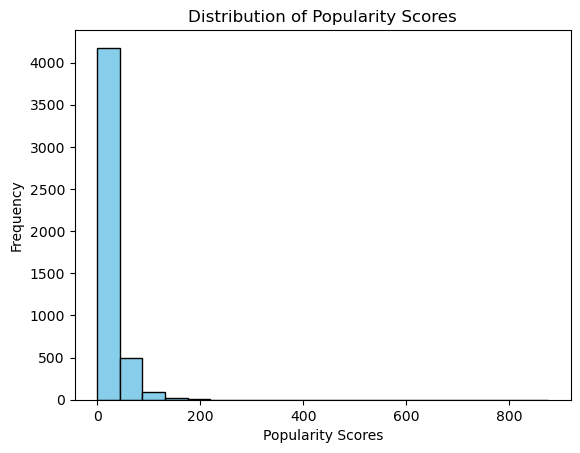

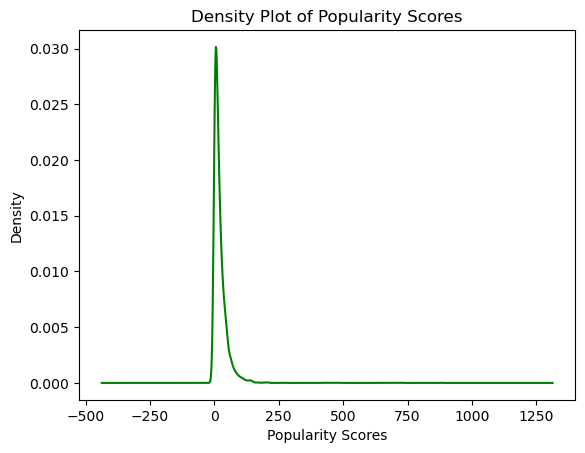

In [41]:
popularity_values = movies_df['popularity']
#histogram
plt.hist(popularity_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Scores')
plt.show()
plt.figure()
#density plot
popularity_values.plot(kind='density', color='green')
plt.xlabel('Popularity Scores')
plt.ylabel('Density')
plt.title('Density Plot of Popularity Scores')
plt.show()

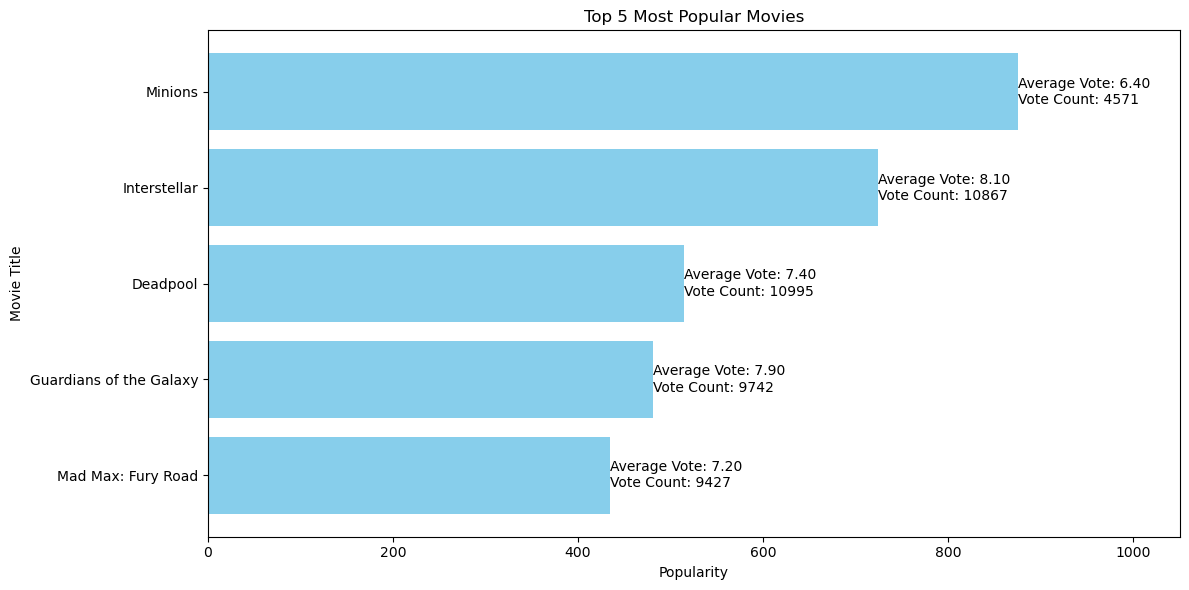

In [43]:
pop = movies_df.sort_values('popularity', ascending=False).head(5)
plt.figure(figsize=(12, 6))
bars = plt.barh(pop['title'], pop['popularity'], color='skyblue')
#annotations for vote average and vote count
for bar, avg, count in zip(bars, pop['vote_average'], pop['vote_count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'Average Vote: {avg:.2f}\nVote Count: {count}',
             va='center', ha='left', fontsize=10, color='black')
    
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.title('Top 5 Most Popular Movies')
plt.gca().invert_yaxis()  #Invert y-axis to show highest popularity at the top
plt.xlim(0, max(pop['popularity']) * 1.2)
plt.tight_layout()
plt.show()

In [45]:
correlation_matrix = movies_df[['popularity', 'vote_average', 'vote_count']].corr()
correlation_matrix

,popularity,vote_average,vote_count
popularity,1.000000,0.273952,0.778130
vote_average,0.273952,1.000000,0.312997
vote_count,0.778130,0.312997,1.000000


In [47]:
v = movies_df.vote_count
R = movies_df.vote_average
C = movies_df['vote_average'].mean()

In [49]:
total_no_of_entry=movies_df.shape[0]
quantile_75 = movies_df['vote_count'].quantile(0.75)
quantile_80 = movies_df['vote_count'].quantile(0.8)
quantile_90 = movies_df['vote_count'].quantile(0.9)
max_vote = movies_df['vote_count'].max()

print("Total votes:",total_no_of_entry)
print("75th Quantile:", quantile_75)
print("80th Quantile:", quantile_80)
print("90th Quantile:", quantile_90)
print("maximum no of vote count:", max_vote)

Total votes: 4803
75th Quantile: 737.0
80th Quantile: 957.6000000000004
90th Quantile: 1838.4000000000015
maximum no of vote count: 13752


In [51]:
m=quantile_90

In [53]:
movies_df['weighted_rating'] = movies_df['vote_count'] / (movies_df['vote_count'] + m) * \
                            movies_df['vote_average'] + (m / (movies_df['vote_count'] + m)) * C

print("TMDB TOP 50 MOVIES")
movies_df[["title","spoken_languages","popularity","release_date","revenue","vote_average",\
               "vote_count","weighted_rating"]].sort_values(by='weighted_rating', ascending=False).head(50)

TMDB TOP 50 MOVIES


,title,spoken_languages,popularity,release_date,revenue,vote_average,vote_count,weighted_rating
1881,The Shawshank Redemption,English,136.747729,1994-09-23,28341469,8.5,8205,8.059258
662,Fight Club,English,146.757391,1999-10-15,100853753,8.3,9413,7.939256
65,The Dark Knight,"普通话, English",187.322927,2008-07-16,1004558444,8.2,12002,7.920020
3232,Pulp Fiction,"Español, English, Français",121.463076,1994-10-08,213928762,8.3,8428,7.904645
96,Inception,"English, 日本語, Français",167.583710,2010-07-14,825532764,8.1,13752,7.863239
3337,The Godfather,"Latin, English, Italiano",143.659698,1972-03-14,245066411,8.4,5893,7.851236
95,Interstellar,English,724.247784,2014-11-05,675120017,8.1,10867,7.809479
809,Forrest Gump,English,138.133331,1994-07-06,677945399,8.2,7927,7.803188
329,The Lord of the Rings: The Return of the King,English,123.630332,2003-12-01,1118888979,8.1,8064,7.727243
1990,The Empire Strikes Back,English,78.517830,1980-05-17,538400000,8.2,5879,7.697884


In [55]:
column_list=["movie_id","budget","revenue","production_companies","production_countries","original_language",
             "release_date","runtime","spoken_languages","status","tagline",
             "popularity","vote_average","vote_count"]
movies_df.drop(columns=column_list,inplace=True,axis=1)

In [57]:
movies_df.head(2)

,title,cast,crew,genres,keywords,overview,weighted_rating
0,Avatar,"SamWorthington, WesStudi, MichelleRodriguez, J...","RickCarter, JamesCameron, JamesHorner, Stephen...","Fantasy, Adventure, Action, ScienceFiction","romance, spacecolony, futuristic, spacetravel,...","In the 22nd century, a paraplegic Marine is di...",7.050669
1,Pirates of the Caribbean: At World's End,"ChowYun-fat, StellanSkarsgård, BillNighy, Kevi...","TerryRossio, GoreVerbinski, CraigWood, EricMcL...","Fantasy, Adventure, Action","ship, loveofone'slife, ocean, drugabuse, exoti...","Captain Barbossa, long believed to be dead, ha...",6.665696


In [63]:
features = ['cast', 'crew', 'title', 'genres', 'keywords', 'overview']

movies_df[features] = movies_df[features].fillna('')
movies_df['combined_features'] = movies_df['cast'] + ',' + movies_df['crew'] + ',' + movies_df['title'] + ',' \
                                + movies_df['genres'] + ',' +movies_df['keywords'] + ' ' + movies_df['overview']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

similarity_scores = linear_kernel(tfidf_matrix, tfidf_matrix)# Compute similarity scores using linear kernel

# Function to recommend movies based on similarity scores
def recommend_movies(movie_title,num):
    
    movie_index = movies_df[movies_df['title'] == movie_title].index[0]# Get the index of the movie title
    movie_similarities = list(enumerate(similarity_scores[movie_index]))
    # Sort the movies based on similarity scores
    movie_similarities = sorted(movie_similarities, key=lambda x: x[1], reverse=True)
    # Recommend top 10 similar movies
    recommended_movies = movie_similarities[1:num+1]  # Exclude the first movie (self)
    recommended_movie_titles = [movies_df.iloc[movie[0]]['title'] for movie in recommended_movies]
    
    return recommended_movie_titles

In [65]:
recommend_movies('GoodFellas',10)

['Casino',
 'The Departed',
 'Run All Night',
 "Angela's Ashes",
 'Gangs of New York',
 'Raging Bull',
 'The Wind That Shakes the Barley',
 'This Thing of Ours',
 'Lucky Break',
 'The Age of Innocence']

In [67]:
movies_df[movies_df['title'].isin(['GoodFellas','Casino','The Departed'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
351,The Departed,"AlecBaldwin, MartinSheen, LeonardoDiCaprio, Ja...","BradPitt, ThelmaSchoonmaker, HowardShore, Mich...","Thriller, Crime, Drama","boston, friends, mole, mafia, police, mobster,...","To take down South Boston's Irish Mafia, the p...",7.361989,"AlecBaldwin, MartinSheen, LeonardoDiCaprio, Ja..."
892,Casino,"PasqualeCajano, AlanKing, DonRickles, JamesWoo...","RobertRichardson, ThelmaSchoonmaker, NicholasP...","Crime, Drama","poker, 1970s, overdose, drugabuse, illegalpros...",The life of the gambling paradise – Las Vegas ...,6.801821,"PasqualeCajano, AlanKing, DonRickles, JamesWoo..."
1847,GoodFellas,"RayLiotta, ChuckLow, PaulSorvino, TonyDarrow, ...","FlorianBallhaus, ThelmaSchoonmaker, ToddArnow,...","Crime, Drama","1970s, massmurder, florida, irish-american, pr...","The true story of Henry Hill, a half-Irish, ha...",7.419750,"RayLiotta, ChuckLow, PaulSorvino, TonyDarrow, ..."


In [69]:
recommend_movies('Avatar',10)

['Titan A.E.',
 'Apollo 18',
 'Aliens',
 'Star Trek Into Darkness',
 'Lifeforce',
 'Alien: Resurrection',
 'Aliens vs Predator: Requiem',
 'Alien³',
 'Gattaca',
 'Moon']

In [71]:
movies_df[movies_df['title'].isin(['Avatar','Titan A.E.','Apollo 18'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
0,Avatar,"SamWorthington, WesStudi, MichelleRodriguez, J...","RickCarter, JamesCameron, JamesHorner, Stephen...","Fantasy, Adventure, Action, ScienceFiction","romance, spacecolony, futuristic, spacetravel,...","In the 22nd century, a paraplegic Marine is di...",7.050669,"SamWorthington, WesStudi, MichelleRodriguez, J..."
539,Titan A.E.,"JaneaneGarofalo, DrewBarrymore, JohnLeguizamo,...","PaulMartinSmith, DavidKirschner, GraemeRevell,...","Family, Action, Animation, Adventure, ScienceF...","animation, mission, alien, monster, dystopia, ...",A young man finds out that he holds the key to...,6.122408,"JaneaneGarofalo, DrewBarrymore, JohnLeguizamo,..."
3604,Apollo 18,"AndrewAirlie, KurtMaxRunte, RyanRobbins, Micha...","TimurBekmambetov, RobinD.Cook, JonathanShore, ...","Thriller, Horror, ScienceFiction","moon, alieninfection, infection, mockumentary,...","Officially, Apollo 17 was the last manned miss...",5.914987,"AndrewAirlie, KurtMaxRunte, RyanRobbins, Micha..."


In [73]:
recommend_movies('Inception',10)

['Batman Begins',
 'The Dark Knight Rises',
 'The Prestige',
 'The Dark Knight',
 'Transcendence',
 'Interstellar',
 'Looper',
 'Subconscious',
 'Blood and Wine',
 'Don Jon']

In [75]:
movies_df[movies_df['title'].isin(['Inception','Batman Begins','Don Jon'])]

,title,cast,crew,genres,keywords,overview,weighted_rating,combined_features
96,Inception,"TomHardy, TomBerenger, CillianMurphy, DileepRa...","JohnPapsidera, WallyPfister, BradRicker, LeeSm...","Action, Adventure, ScienceFiction, Thriller, M...","sleep, heist, dream, lossoflover, subconscious...","Cobb, a skilled thief who commits corporate es...",7.863239,"TomHardy, TomBerenger, CillianMurphy, DileepRa..."
119,Batman Begins,"CillianMurphy, MichaelCaine, TomWilkinson, Rut...","JamesNewtonHoward, JohnPapsidera, CharlesRoven...","Crime, Drama, Action","hero, crimefighter, martialarts, himalaya, los...","Driven by tragedy, billionaire Bruce Wayne ded...",7.218600,"CillianMurphy, MichaelCaine, TomWilkinson, Rut..."
3530,Don Jon,"BrieLarson, GlenneHeadly, JosephGordon-Levitt,...","JohnHartigan, RyanKavanaugh, VenusKanani, Mary...","Comedy, Romance, Drama","sex, sexaddiction, pornography, malefemalerela...","A New Jersey guy dedicated to his family, frie...",6.000669,"BrieLarson, GlenneHeadly, JosephGordon-Levitt,..."


In [77]:
def recommend_movies_hybrid(movie_title):
    # find top 20 movies based on similarity score
    top_20_similar_movies=recommend_movies(movie_title,20)
    # Recommend top 10 movies based on weighted rating
    recommended_movies_rating = movies_df[movies_df['title'].isin(top_20_similar_movies)]\
    .sort_values('weighted_rating', ascending=False)['title'].head(10).tolist()
    return recommended_movies_rating

In [79]:
recommend_movies_hybrid('Inception')

['The Dark Knight',
 'Interstellar',
 'Memento',
 'The Prestige',
 'The Dark Knight Rises',
 'Batman Begins',
 'Mission: Impossible - Rogue Nation',
 'Now You See Me 2',
 'Looper',
 'Man of Steel']

In [81]:
recommend_movies_hybrid('GoodFellas')

['The Departed',
 'Casino',
 'Raging Bull',
 'Gangs of New York',
 'Sleepers',
 'Cape Fear',
 'Ronin',
 'A Most Wanted Man',
 'Run All Night',
 'The Wind That Shakes the Barley']

In [83]:
recommend_movies_hybrid('Avatar')

['The Matrix',
 'Alien',
 'Aliens',
 'Star Trek Into Darkness',
 'E.T. the Extra-Terrestrial',
 'Moon',
 'Gattaca',
 'Independence Day',
 'The Book of Life',
 "Ender's Game"]